**Girish Palya**


>**Task 1**

>(in this task, we ignore the time value of money)
Imagine there is August and we see a very profitable offer for skiing/snowboarding on the travel agency's website. We are wondering whether to buy now or just before the season. Should we buy insurance? Our decisions depend on the prices, but also on our risk attitude. Suppose the utility function of a typical skier/snowboarder is described by the formula:  , where M is the level of wealth and η is a parameter of the function (for simplification η < 1)


>a) Investigate the features of this utility function in terms of risk modelling. Simple calculate and draw the absolute and relative Arrow-Pratt measures of risk-aversion [AP, AP_R] as a function of wealth(M). Interpret the results. (5p) [Hint:  AP = - ''U/'U, AP_R = M(''U/'U) Example ; (i) utility function U(M) = M-aM^2 represents increasing absolute risk aversion and increasing relative risk aversion (ii) U(M) = log(M) represents decreasing absolute risk aversion and constant relative risk aversion. 



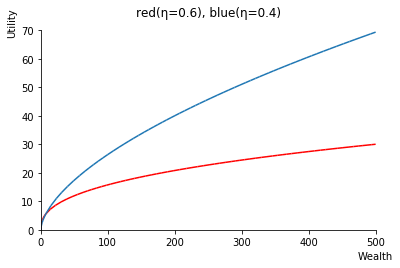

In [4]:
%matplotlib inline
import sympy as sym
from sympy.plotting import plot

M, η = sym.symbols('M η')

U = M**(1-η)/(1-η)
# η < 1

# plot utility function for different η values
pl = plot(U.subs(η, 0.6), (M, 0, 500), xlabel='Wealth', ylabel='Utility', line_color='red', show=False, 
         title='red(η=0.6), blue(η=0.4)')
pl.extend(plot(U.subs(η, 0.4), (M, 0, 500), show=False))
pl.show()


```
This is a typical Risk Aversion utility function, where slope of the curve flattens (Concave) as wealth increases. Marginal utility of having an unit of additional wealth decreases as total wealth increases. As 'η' value is increased, the curve becomes more concave, and risk aversion increases.
```

**Plot of Arrow–Pratt measure of absolute risk aversion (AP):**

In [5]:
dU = sym.diff(U, M)
ddU = sym.diff(dU, M)
AP = -ddU/dU
AP.simplify()
ddU.simplify()

-M**(-η)*η/M

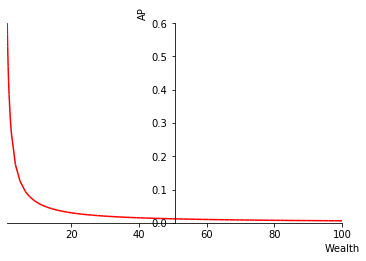

In [6]:
pl = plot(AP.subs(η, 0.6), (M, 1, 100), xlabel='Wealth', ylabel='AP', line_color='red', show=True)


**Comments:**

- Risk Aversion is extremely high when wealth is low (poor). Towards M=0 line is vertical (AP=infinity)
- Risk Aversion rapidly decreases as person becomes rich. But rate of decrease levels off after a certain amount of wealth. There is a certain level of wealth (in the figure above, M around 10) where rate of decrease in risk aversion starts leveling off - this indicates that person cares less about losing/aquiring extra unit of wealth (as he gets richer). His marginal utility is less as he becomes wealthy.

**Plot Arrow-Pratt measure of relative risk aversion AP_R:**

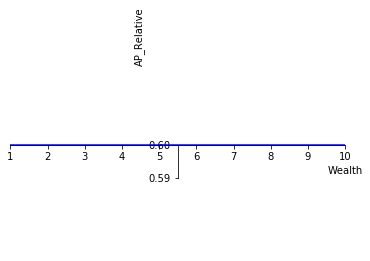

In [7]:
AP_R = AP * M
pl = plot(AP_R.subs(η, 0.6), (M, 1, 10), xlabel='Wealth', ylabel='AP_Relative', line_color='blue', show=True)

**Comment**

This Utility function exhibits constant Relative Risk Aversion with AP_R = η. Constant Relative Risk aversion implies a decreasing Absolute Risk Aversion. Since our Utility function does not exhibit a reversal in risk aversion (over values of M), relative risk aversion does not reveal any new insights. It just shows that, relative to the amount of wealth a person has, his risk aversion (relative) is constant. This is a feature of isoelastic utility function that we have, where elasticity of intertemporal substitution is 1/η.




>Let's assume that we valuate our trip subjectively at SV = 3000$. If we fail to go, we will treat this value as a loss. Let's assume that we have 3 trip purchase options, which we can treat as lotteries:

>1. We buy a trip at a low price in August (C1 = 600$). In case of bad weather and lack of snow, we don't go, the travel agency does not refund us for the trip and we lose: i) the subjective value of the trip ii) cost of it C1.



In [8]:
p, M0, q = sym.symbols('p M0 q')
snow = M0 + 2400
no_snow = M0 - 3600
wealth_L1 = [snow, no_snow]
probability_L1 = [p, 1-p]

expected_wealth_L1 = sum((p*v) for p, v in zip(probability_L1, wealth_L1))
expected_wealth_L1.simplify()

M0 + 6000*p - 3600

In [9]:
variance_L1 = sum((p * (v - expected_wealth_L1)**2) for p, v in zip(probability_L1, wealth_L1))
variance_L1.simplify()

36000000*p*(1 - p)


>2. We buy a last minute trip. We choose a place where there is snow and well-prepared routes, we are sure of a good trip, but the price is much higher, C2 = 1800$.


In [10]:
expected_wealth_L2 = M0 + 1200
variance_L2 = 0


>We buy a trip at a low price of C1 = 600\\$  in August. We insure ourselves in such a way that we buy a "snow guarantee". The guarantee allows us to change the location. If there is no snow at the destination one week before departure, we can choose another one. We pay the extra cost of insurance K. We do not have a full guarantee that the conditions will be very good in the new location. If they are not, our subjective valuation of the trip decreases to SV2 = \\$2000 


In [11]:
wealth_L3 = [M0+2200, M0+1200, M0+2200]
probability_L3 = [(1-p)*(1-q), (1-p)*q, p]

expected_wealth_L3 = sum((p*v) for p, v in zip(probability_L3, wealth_L3))
expected_wealth_L3.simplify()

M0 + 1000*p*q - 1000*q + 2200

In [12]:
variance_L3 = sum((p * (v - expected_wealth_L3)**2) for p, v in zip(probability_L3, wealth_L3))
variance_L3.simplify()

1000000*q*(-p**2*q + 2*p*q - p - q + 1)


>b) For M0 = 10000, p = 0.5, q = 0.5, simplify the lottery (3). Calculate the basic characteristics of these lotteries: expected values and variances (4p)



In [13]:
print('      Expected Value         Variance')
spaces = '                  '
print(f'L1    {expected_wealth_L1.evalf(subs={M0:10000, p:0.5, q:0.5}):.0f}{spaces} {variance_L1.evalf(subs={M0:10000, p:0.5, q:0.5}):.0f}')
print(f'L2    {expected_wealth_L2.evalf(subs={M0:10000}):.0f}{spaces}{variance_L2:.0f}')
print(f'L3    {expected_wealth_L3.evalf(subs={M0:10000, p:0.5, q:0.5}):.0f}{spaces}{variance_L3.evalf(subs={M0:10000, p:0.5, q:0.5}):.0f}')

      Expected Value         Variance
L1    9400                   9000000
L2    11200                  0
L3    11950                  187500



>c) Assuming that the typical person is risk-neutral (η = 0) can be concluded what the option the person will choose? (4) 

>Hint: the risk-neutral person will evaluate the lotteries by expected values. 


**Comment**
Risk neutral person will choose Lottery-3. Expected value of wealth is highest for this option.


>d) By assuming risk-aversion (η parameter is unknown) can you conclude (using the concept of stochastic dominance) about the choice of the person? (5p)

>Hint: [For lottery A and B for a risk-averse person:

>E(A) > E(B) and var(A) ≤ var(B) --> A is preferred 
>E(A) = E(B) and var(A) < var(B) --> A is preferred 
>E(A) > E(B) and var(A) > var(B) --> we cannot conclude --> choice depends on risk attitude]


**comment** We cannot conclude between Lottery-3 and Lottery-2. If they are risk averse, they will choose Lottery-2. Otherwise (risk lover), they will choose Lottery-3.


>f) For which values η will the person choose insurance options (3) in relation to options (1) and (3)? Assume M0 = 10000, p = 0.5, q = 0.5 (7p) 
[Hint: present U(L1), U (L2), U (L3) as functions η in the interval [-1, 1) and do the graph. 


In [14]:
# Expected Utility: u(c1, c2, π1, π2) = π1*v(c1) + π2*v(c2)
contingent_cons_L1 = [U.subs(M, w) for w in wealth_L1]
U_L1 = sum((prob * w) for prob, w in zip(probability_L1, contingent_cons_L1))
U_L1_n = U_L1.subs(M0, 10000).subs(p, 0.5).simplify()
U_L1_n

-(3200.0*6400**(-η) + 6200.0*12400**(-η))/(η - 1)

In [15]:
contingent_cons_L1 = [U.subs(M, w) for w in wealth_L1]
U_L2 = U.subs(M, expected_wealth_L2)
U_L2_n = U_L2.subs(M0, 10000)
U_L2_n

11200**(1 - η)/(1 - η)

In [16]:
contingent_cons_L3 = [U.subs(M, w) for w in wealth_L3]
U_L3 = sum((prob * w) for prob, w in zip(probability_L3, contingent_cons_L3))
U_L3_n = U_L3.subs(q, 0.5).subs(M0, 10000).subs(p, 0.5).simplify()
U_L3_n

-(9150.0*12200**(-η) + 2800.0*11200**(-η))/(η - 1)

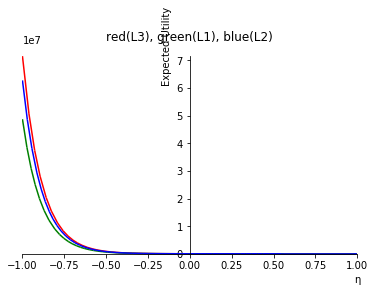

In [17]:
pl = plot(U_L3_n, (η, -1, 1), xlabel='η', ylabel='Expected Utility', line_color='red', show=False, 
         title='red(L3), green(L1), blue(L2)')
pl.extend(plot(U_L1_n, (η, -1, 1), line_color='green', show=False))
pl.extend(plot(U_L2_n, (η, -1, 1), line_color='blue', show=False))
pl.show()

**Note:**  
L3 has higher **Expected Utility** than both L1 and L2 for every value of η. So L3 will be choosen always. In general, a risk averse person (as given by the Utility function) will always choose the insurance option (at "fair" premium).


>f) What is the maximum amount of insurance K that the person is willing to pay? Assume M0 = 10000, p = q = 0.5, η = 0.3. [Hint: present U(L3) as functions of K in the interval [0, 1000] and graph the relation; include the levels of  utility of L1 and L2 for the assumed parameters]



In [18]:
K = sym.Symbol('K')
wealth_L3_n = [M0+2400-K, M0+1400-K, M0+2400-K]

In [19]:
contingent_cons_L3 = [U.subs(M, w) for w in wealth_L3_n]
U_L3_k = sum((prob * w) for prob, w in zip(probability_L3, contingent_cons_L3))
U_L3_kn = U_L3_k.subs(q, 0.5).subs(M0, 10000).subs(p, 0.5).subs(η, 0.3).simplify()
U_L3_kn

0.357142857142857*(11400 - K)**0.7 + 1.07142857142857*(12400 - K)**0.7

In [20]:
U_L1_n.subs(η, 0.3)

853.682592118619

In [21]:
U_L2_n.subs(η, 0.3)

975.785984348825

In [22]:
U_L3_kn.subs(K, 950)

975.629735486676

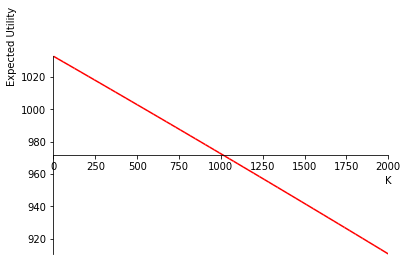

In [23]:
pl = plot(U_L3_kn, (K, 0, 2000), xlabel='K', ylabel='Expected Utility', line_color='red', show=False)
pl.show()

**Comments:**

Since "Last minute purchase (L2)" results in expected utility of 975, they are willing to pay (K) for insurance less than the value of K that would provide expected utility of 975 under lottery L3.

This value of K is approximately 950\\$

They are willing to pay up to 950\\$

>g) How does the choice depend on the initial wealth M0? Assume p = q = 0.5, η = 0.3, K = 200   [Hint: for the assumed parameters, present U(L1), U(L2), U(L3) as functions of M0 in the interval [100, 100000] and graph the relations;]


In [24]:
U_L1_n = U_L1.subs(q, 0.5).subs(p, 0.5).subs(η, 0.3).simplify()
U_L1_n

0.714285714285714*(M0 - 3600)**0.7 + 0.714285714285714*(M0 + 2400)**0.7

In [25]:
U_L2_n = U_L2.subs(η, 0.3).simplify()
U_L2_n

1.42857142857143*(M0 + 1200)**0.7

In [26]:
U_L3_n = U_L3.subs(q, 0.5).subs(p, 0.5).subs(η, 0.3).simplify()
U_L3_n

0.357142857142857*(M0 + 1200)**0.7 + 1.07142857142857*(M0 + 2200)**0.7

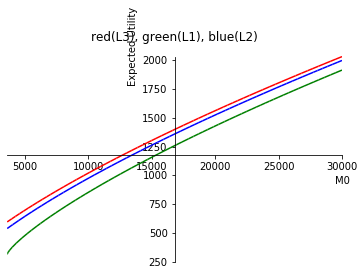

In [27]:
pl = plot(U_L3_n, (M0, 3600, 30000), xlabel='M0', ylabel='Expected Utility', line_color='red', show=False, 
         title='red(L3), green(L1), blue(L2)')
pl.extend(plot(U_L1_n, (M0, 3600, 30000), line_color='green', show=False))
pl.extend(plot(U_L2_n, (M0, 3600, 30000), line_color='blue', show=False))
pl.show()

**Comment**

L3 is always preferred regardless of value of initial wealth (M0), since expected utility is always higher than L1 and L2.

>h) How does the choice depend on the probability of good weather p? Assume M0 = 10000, q = 0.5, η = 0.3, K = 200  [Hint: for the assumed parameters, present U(L1), U(L2), U(L3) as functions of p in the interval [0, 1] and graph the relations;]


In [28]:
U_L1_n = U_L1.subs(q, 0.5).subs(M0, 10000).subs(η, 0.3).simplify()
U_L1_n

388.325270264929*p + 659.519956986155

In [29]:
U_L2_n = U_L2.subs(q, 0.5).subs(M0, 10000).subs(η, 0.3).simplify()
U_L2_n

975.785984348825

In [30]:
U_L3_n = U_L3.subs(q, 0.5).subs(M0, 10000).subs(η, 0.3).simplify()
U_L3_n

30.0999540729745*p + 1005.8859384218

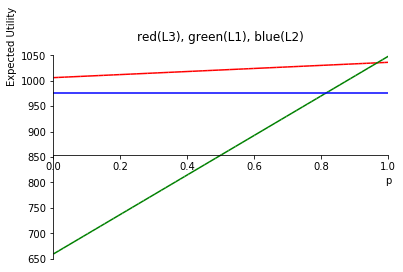

In [31]:
pl = plot(U_L3_n, (p, 0, 1), xlabel='p', ylabel='Expected Utility', line_color='red', show=False, 
         title='red(L3), green(L1), blue(L2)')
pl.extend(plot(U_L1_n, (p, 0, 1), line_color='green', show=False))
pl.extend(plot(U_L2_n, (p, 0, 1), line_color='blue', show=False))
pl.show()

In [32]:
sym.solve((U_L1_n - U_L3_n), p)

[0.966894202558383]

In [33]:
sym.solve((U_L1_n - U_L2_n), p)

[0.814435864930712]

**comment**

- As probability of good weather increases, L1 (not buying insurance) becomes more attractive. Why pay more for insurnace when probability of good weather is close to 1.
- For probability of 97% (and higher) of good weather, buying insurance (L3) is not a good choice. L1 is better.
- For probability of 81% (and higher) of good weather, L1 is better choice than L2.
- Buying insurance (L3) is always better than option L2. This is due to high cost of last minute travel (C2=1800). If this cost is lover then buying insurance (L3) becomes less attractive option.

>i) What is the trade-off between p and the K? Analyse only lottery L1 and L2 (8p) [ without hint - for the best grade]

I will explain the tradeoff between p and K using a picture (and without using numbers).  

**Lottery L1**

In the following picture, lottery L1 is represented by (A1, A2) levels of wealth. A1 corresponds to bad weather, and A2 to good weather. All points on between A1 and A2 on the x-axis represent 'expected value' of wealth at any given probability p of good weather. Similarly, points on the U(A1) and U(A2) line segment (red) represent different possibilities of 'expected utility', based on probability p of good weather occuring.

When a person buys insurance, they are essentially opting for a differnt set of expected utilities (based on probability p). Say, they spend K on insurance and guarantees worst weather wealth to be B1 and best weather wealth to be B2, we can draw correponding U(B1) and U(B2) line (blue) of 'expected wealth' under insurance.

This is a risk averse person, since the utility curve has concave slope.

Conclusions:   
- When p is very high (~1) it does not make sense to buy insurance (K is a cost) since U(A1) > U(B2)
- When K (cost) is very high then the point U(B2) moves closer to (A1). The best case utility with insurance is now closer to worst case utility without insurance. For real probabilities (p>0), buying insurance at very high K is not beneficial.
- When p is low and K is low, the user gets better set of expected wealth when he he/she buys insurance, than otherwise. This is evident because the blue line [U(B1), U(B2)] is above the red line [U(A1), U(A2)].
- When K is high and p is high, the value of insurance diminishes.


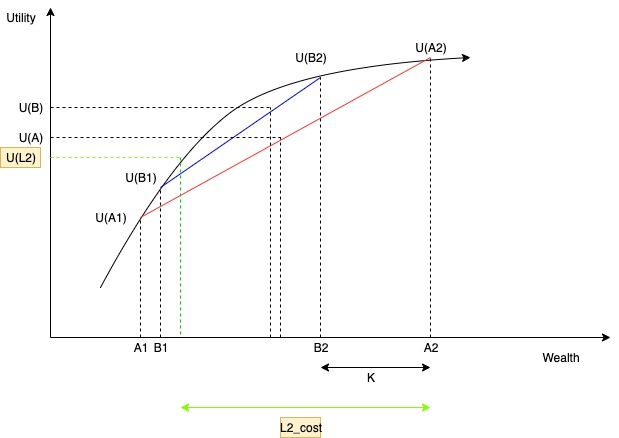


<br><br>
**Lottery L2**

Lottery L2 is a special case of insurance where K is the extra price paid (at last minute) to remove uncertainity. This means range of p converges to 1. Utility obtained in this case is less than U(A2) but much better than U(A1). In the picture, this extra cost is represented as L2_cost, and utility is U(L2), but this utility is higher than U(A1), but lower than U(A2). The advantage is that this level of utility is guaranteed. 